<!-- <h1> <div align="center"> Analysis and Systems of Big Data </div>  </h1>
<h2> <div align="center"> Assignment </div> </h2> 
<h2> <div align="center"> Ajay Narayanan -  COE16B044 </div> </h2>  -->
<h2> Part A  </h2> 
<br>
Descriptive and Predictive Analysis on plants dataset. The dataset is a copy of the “US States Plants dataset for Connecticut" from Plants Databse.
<a href="https://plants.sc.egov.usda.gov/java/stateDownload?statefips=US09">https://plants.sc.egov.usda.gov/java/stateDownload?statefips=US09</a>

In [1]:
# Read the dataset
import pandas as pd
import numpy as np
df = pd.read_csv("plants.csv",)

<h2> Descriptive Analytics </h2>

In [2]:
# Display few records from the dataset and summarize the details about the dataset contents
print("Number of records in the dataset = ", len(df), end ="\n\n")

Number of records in the dataset =  12461



In [3]:
print("====================== Sample records ====================== ")
print(df.head(), end ="\n\n")

====================== Sample records ====================== 
   Symbol Synonym Symbol                      Scientific Name with Author  \
0  ACARO2            NaN                            Acarospora A. Massal.   
1    ACER            NaN                                          Acer L.   
2    ACGI            NaN                              Acer ginnala Maxim.   
3    ACGI          ACTAG  Acer tataricum L. ssp. ginnala (Maxim.) Wesmael   
4   ACNE2            NaN                                  Acer negundo L.   

  National Common Name          Family  
0       cracked lichen  Acarosporaceae  
1                maple       Aceraceae  
2           Amur maple       Aceraceae  
3                  NaN       Aceraceae  
4             boxelder       Aceraceae  



In [4]:
print("====================== Statistics of data ====================== ")
print(df.describe())

====================== Statistics of data ====================== 
       Symbol Synonym Symbol  \
count   12461           7926   
unique   4535           7926   
top      MIGU         CAPA22   
freq       70              1   

                              Scientific Name with Author  \
count                                               12461   
unique                                              12459   
top     Sarracenia purpurea L. ssp. purpurea var. purp...   
freq                                                    2   

       National Common Name      Family  
count                  4526       12461  
unique                 3587         193  
top           hybrid violet  Asteraceae  
freq                     14        1592  


In [5]:
print("====================== Dataset Information ====================== ")
print(df.info())

====================== Dataset Information ====================== 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12461 entries, 0 to 12460
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Symbol                       12461 non-null  object
 1   Synonym Symbol               7926 non-null   object
 2   Scientific Name with Author  12461 non-null  object
 3   National Common Name         4526 non-null   object
 4   Family                       12461 non-null  object
dtypes: object(5)
memory usage: 486.9+ KB
None


In [6]:
print("====================== Total number of NAN values per column ====================== ")
print(df.isnull().sum(axis = 0))

====================== Total number of NAN values per column ====================== 
Symbol                            0
Synonym Symbol                 4535
Scientific Name with Author       0
National Common Name           7935
Family                            0
dtype: int64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

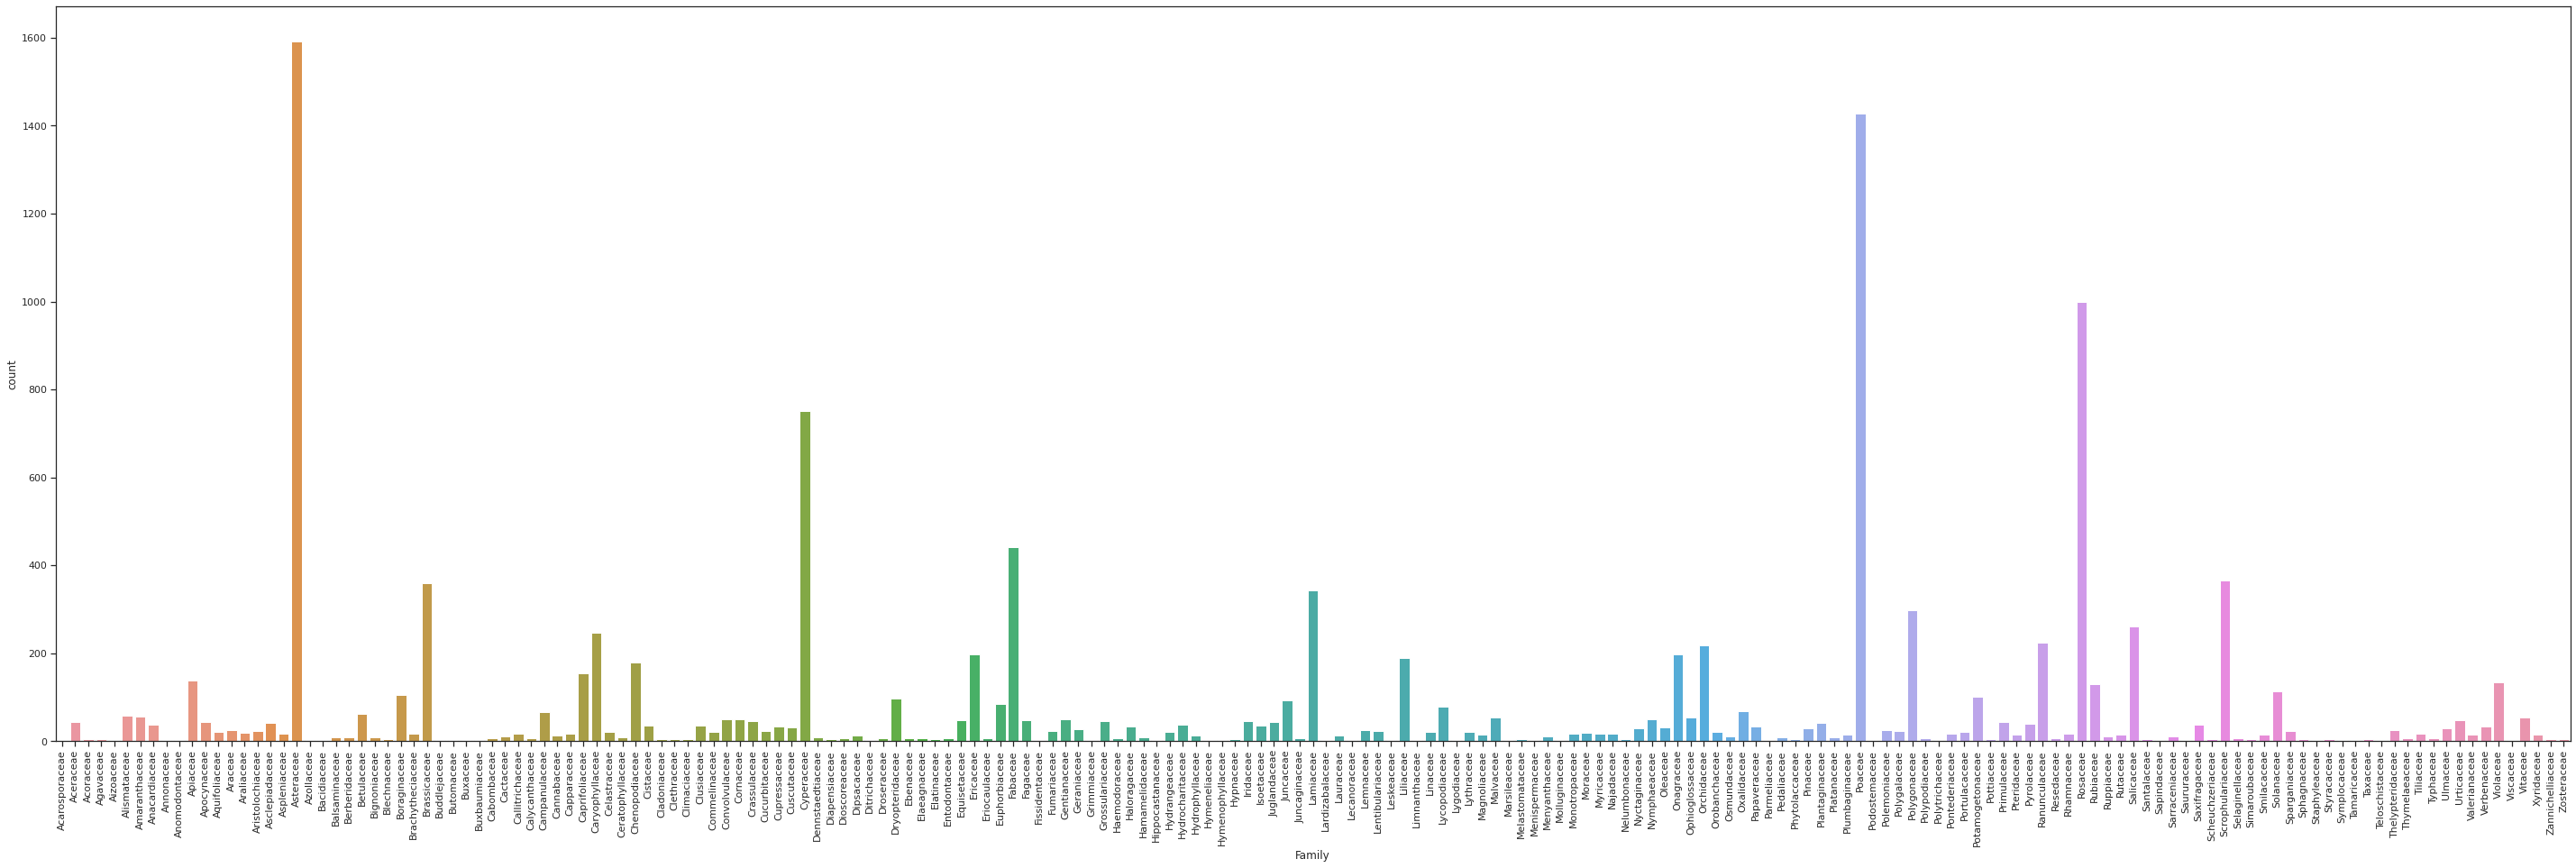

In [8]:
# Frequency vs Family plot
plt.figure(figsize=(50,15))
sns.set(style="ticks", color_codes=True)
sns.countplot(df['Family'])
plt.xticks(rotation = 90);

In [9]:
df['Family'].value_counts()

Asteraceae         1592
Poaceae            1428
Rosaceae           1000
Cyperaceae          751
Fabaceae            441
                   ... 
Fissidentaceae        1
Teloschistaceae       1
Hymeneliaceae         1
Acarosporaceae        1
Bacidiaceae           1
Name: Family, Length: 193, dtype: int64

In [10]:
df['Synonym Symbol'].value_counts()

CAPA22    1
APMEL2    1
POMO8     1
ALPLA     1
RUWI2     1
         ..
IPPUD     1
SAPEA2    1
RUCL3     1
ARAT5     1
TAGL2     1
Name: Synonym Symbol, Length: 7926, dtype: int64

<h2> Data Preprocessing  </h2>

We can see that the columns, 'Synonym Symbol' and 'National Common Name' has significant amount of 'NAN' values. These 'NAN' values will be a hindrance while doing analysis on the dataset. There are many methods to handle the missing/NAN values. We adopt the simplest among them - replacing the 'NAN' values with the mode of the column.   

In [11]:
print("====================== Replacing nan with mode  ====================== ")
# Mode computation ignores NAN 
for column in df:
    df[column] = df[column].fillna(df[column].mode()[0])

print("====================== Statistics of data ====================== ")
print(df.describe())

print("====================== Total number of NAN values per column ====================== ")
print(df.isnull().sum(axis = 0))

df.to_csv("plants_preprocessed.csv", encoding='utf-8', index=False)

====================== Replacing nan with mode  ====================== 
====================== Statistics of data ====================== 
       Symbol Synonym Symbol  \
count   12461          12461   
unique   4535           7926   
top      MIGU          ABAB3   
freq       70           4536   

                              Scientific Name with Author  \
count                                               12461   
unique                                              12459   
top     Sarracenia purpurea L. ssp. purpurea var. purp...   
freq                                                    2   

       National Common Name      Family  
count                 12461       12461  
unique                 3587         193  
top           hybrid violet  Asteraceae  
freq                   7949        1592  
====================== Total number of NAN values per column ====================== 
Symbol                         0
Synonym Symbol                 0
Scientific Name with Author    0
N

<h2> Predictive Analytics </h2>

Here we try to predict the family given Symbol, Synonym Symbol and National Common Name

In [12]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np 

In [13]:
# Read the preprocessed dataset
df = pd.read_csv("plants_preprocessed.csv")
X_labels = [ 'Symbol', 'Synonym Symbol', 'National Common Name']
Y_labels = ['Family']

print("====================== Dataset before encoding ======================")
print(df[X_labels + Y_labels].head())
# Convert categorical data to integers using a labelencoder
for label in X_labels + Y_labels: 
    df[label] = LabelEncoder().fit_transform(df[label]) 

print("\n\n====================== Dataset after encoding ======================")
print(df[X_labels + Y_labels].head())

====================== Dataset before encoding ======================
   Symbol Synonym Symbol National Common Name          Family
0  ACARO2          ABAB3       cracked lichen  Acarosporaceae
1    ACER          ABAB3                maple       Aceraceae
2    ACGI          ABAB3           Amur maple       Aceraceae
3    ACGI          ACTAG        hybrid violet       Aceraceae
4   ACNE2          ABAB3             boxelder       Aceraceae


====================== Dataset after encoding ======================
   Symbol  Synonym Symbol  National Common Name  Family
0      11               0                  1167       0
1      13               0                  2083       1
2      14               0                    71       1
3      14              61                  1852       1
4      21               0                   817       1


In [14]:
# Split the dataset into test and trainig set
X_train, X_test, y_train, y_test = train_test_split(df[X_labels], df[Y_labels], test_size =0.2)

In [15]:
# Fit a Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train.values.ravel()).predict(X_test)
acc_nb = sum(y_test.values.ravel() == y_pred)/len(y_pred)
print("Accuracy of Gaussian Naive Bayes classifier = ", acc_nb)

Accuracy of Gaussian Naive Bayes classifier =  0.14640994785399117


In [16]:
# Fit a Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
acc_rfc = sum(y_test.values.ravel() == y_pred)/len(y_pred)
print("Accuracy of Random Forest classifier = ", acc_rfc)

Accuracy of Random Forest classifier =  0.6550340954673085


In [17]:
# Fit a Decision Tree Classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_tc = sum(y_test.values.ravel() == y_pred)/len(y_pred)
print("Accuracy of Decision Tree classifier = ", acc_tc)

Accuracy of Decision Tree classifier =  0.7557160048134778


In [18]:
# Fit Extremely randomized tree classifier
from sklearn.tree import ExtraTreeClassifier
clf = ExtraTreeClassifier()
clf = clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
acc_etc = sum(y_test.values.ravel() == y_pred)/len(y_pred)
print("Accuracy of Extremely randomized tree classifier. = ", acc_etc)

Accuracy of Extremely randomized tree classifier. =  0.6209386281588448


In [19]:
#Best Model

results = pd.DataFrame({
'Model': ['ExtraTreeClassifier',
'Decision Tree Classifier',
'Random Forest Classifier', 
'Gaussian Naive Bayes',
],
'Score': [acc_etc,acc_tc, acc_rfc, acc_nb]})
result_df = results.sort_values(by='Score', ascending=False)
print(result_df)


                      Model     Score
1  Decision Tree Classifier  0.755716
2  Random Forest Classifier  0.655034
0       ExtraTreeClassifier  0.620939
3      Gaussian Naive Bayes  0.146410


<h4> For predicting family of a plant (using Symbol, Synonym Symbol and National Common Name), Decision Tree classifier performs the best </h4>

<h1> Part B </h1>

The various metrics for evaluating association rules are as follows <br>
Given a rule 'A -> C', A stands for antecedent and C stands for consequent. <br>

<h3> 1. Support </h3> <br><div align = 'center'>$\text{support}(A\rightarrow C) = \text{P}(A \cup C), \;\;  \text{support}(A) = \text{P}(A)$</div> <br>
     Support(A→C) is the probability of transactions that contain both itemsets A and C together in the database. Also, Support(A) = P(A) where A is an itemset.  

<h3> 2. Confidence </h3> <br><div align = 'center'>$\text{confidence}(A\rightarrow C) = \frac{\text{support}(A\rightarrow C)}{\text{support}(A)}$</div> <br>
    It is the probability of transactions that contain itemsets C given that itemset A occurs in the transcation.

<h3> 3. Lift </h3> <br><div align = 'center'>$\text{lift}(A\rightarrow C) = \frac{\text{confidence}(A\rightarrow C)}{\text{support}(C)}$</div>

The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.

<h3> 4. Leverage </h3><br><div align = 'center'>$\text{Levarage}(A\rightarrow C) = \text{support}(A\rightarrow C) - \text{support}(A) \times \text{support}(C)$</div>

Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. An leverage value of 0 indicates independence.

<h3> 5. Conviction </h3><br><div align = 'center'>$\text{conviction}(A\rightarrow C) = \frac{1 - \text{support}(C)}{1 - \text{confidence}(A\rightarrow C)}$</div>


A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.


<h2> Association rule mining (ARM) </h2>

ARM involves two steps, <br>
1) Finding itemsets <br>
2) Generating rules based on itemsets <br>
<br>
The itemsets are further classfied into <br>
a) FIs(Frequent Itemsets) <br>
b) MFIs(Maximal Frequent Itemsets) <br>
c) CFIs(Closed Frequent Itemsets)

In this section, we perform mining of all the above mentioned itemsets and show rules for few algorithms alone.

In [20]:
# Import the necessary packages
from mlxtend.frequent_patterns import apriori, association_rules, fpmax
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from tabulate import tabulate

# One-hot encoding of the preprocessed plants dataset
df = pd.read_csv("plants_preprocessed.csv")
encoder = TransactionEncoder()
encoded_values = encoder.fit(df.values.tolist()).transform(df.values.tolist())
df_onehot = pd.DataFrame(encoded_values, columns=encoder.columns_)

<h3> Frequent Itemset Mining </h3> <br>
For frequent itemset mining, we use two algorithms <br>
1) Apriori <br>
2) FP Growth

In [21]:
# Frequent Itemset Mining
print("================ Apriori ================")
itemsets = apriori(df_onehot,min_support=0.009,use_colnames=True)
print(itemsets)
print("\n\n RULES based on Apriori : \n\n")
association_rules(itemsets, metric="confidence", min_threshold=0.7)

================ Apriori ================
     support                           itemsets
0   0.364016                            (ABAB3)
1   0.011075                         (Apiaceae)
2   0.127759                       (Asteraceae)
3   0.028810                     (Brassicaceae)
4   0.012359                   (Caprifoliaceae)
5   0.019822                  (Caryophyllaceae)
6   0.014285                   (Chenopodiaceae)
7   0.060268                       (Cyperaceae)
8   0.015890                        (Ericaceae)
9   0.035390                         (Fabaceae)
10  0.027446                        (Lamiaceae)
11  0.015167                        (Liliaceae)
12  0.015809                       (Onagraceae)
13  0.017495                      (Orchidaceae)
14  0.114598                          (Poaceae)
15  0.023915                     (Polygonaceae)
16  0.017976                    (Ranunculaceae)
17  0.080250                         (Rosaceae)
18  0.010352                        (Rubiaceae

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ericaceae),(hybrid violet),0.015890,0.63791,0.011476,0.722222,1.132169,0.001340,1.303523
1,(Onagraceae),(hybrid violet),0.015809,0.63791,0.012198,0.771574,1.209533,0.002113,1.585148
2,(Poaceae),(hybrid violet),0.114598,0.63791,0.081615,0.712185,1.116434,0.008512,1.258064
3,(Polygonaceae),(hybrid violet),0.023915,0.63791,0.018377,0.768456,1.204646,0.003122,1.563808
4,(Rosaceae),(hybrid violet),0.080250,0.63791,0.058904,0.734000,1.150632,0.007711,1.361240
5,(Salicaceae),(hybrid violet),0.020865,0.63791,0.017414,0.834615,1.308359,0.004104,2.189380


In [22]:
# Frequent Itemset Mining
print("================ FP Growth ================")
itemsets = fpgrowth(df_onehot,min_support=0.009,use_colnames=True)
print(itemsets)
print("\n\n RULES based on FP Growth : \n\n")
print(association_rules(itemsets, metric="confidence", min_threshold=0.7))

================ FP Growth ================
     support                           itemsets
0   0.364016                            (ABAB3)
1   0.637910                    (hybrid violet)
2   0.011075                         (Apiaceae)
3   0.127759                       (Asteraceae)
4   0.028810                     (Brassicaceae)
5   0.012359                   (Caprifoliaceae)
6   0.019822                  (Caryophyllaceae)
7   0.014285                   (Chenopodiaceae)
8   0.060268                       (Cyperaceae)
9   0.015890                        (Ericaceae)
10  0.035390                         (Fabaceae)
11  0.027446                        (Lamiaceae)
12  0.015167                        (Liliaceae)
13  0.015809                       (Onagraceae)
14  0.017495                      (Orchidaceae)
15  0.114598                          (Poaceae)
16  0.023915                     (Polygonaceae)
17  0.017976                    (Ranunculaceae)
18  0.080250                         (Rosace

<h3> Closed Itemset Mining </h3> <br>
For closed itemset mining, we use the following two algorithms <br>
1) ECLAT-Close <br>
2) Apriori-Close

In [23]:
# Closed Itemset Mining
from fim import eclat, apriori

# df = pd.read_csv("plants_preprocessed.csv")
dataset = df.values.tolist()

print("================  ECLAT - CLOSE ================ ")
itemsets = eclat(dataset,target='c',supp=2,report='s')
print(tabulate(itemsets,  headers=['Itemset', 'Support'], tablefmt='pretty'))


print("\n\n\n================  Apriori - CLOSE  ================ ")
itemsets = apriori(dataset,target='c',supp=2,report='s')
print(tabulate(itemsets,  headers=['Itemset', 'Support'], tablefmt='pretty'))

================  ECLAT - CLOSE ================ 
+---------------------------------+----------------------+
|             Itemset             |       Support        |
+---------------------------------+----------------------+
|         ('Salicaceae',)         | 0.02086509910922077  |
|        ('Polygonaceae',)        | 0.023914613594414574 |
|         ('Lamiaceae',)          | 0.02744563036674424  |
|        ('Brassicaceae',)        | 0.028809886846962524 |
|      ('Scrophulariaceae',)      | 0.029371639515287696 |
|  ('Fabaceae', 'hybrid violet')  | 0.02126635101516732  |
|          ('Fabaceae',)          | 0.035390418104485996 |
|     ('Cyperaceae', 'ABAB3')     | 0.02503811893106492  |
| ('Cyperaceae', 'hybrid violet') | 0.03522991734210738  |
|         ('Cyperaceae',)         | 0.060268036273172294 |
|      ('Rosaceae', 'ABAB3')      | 0.021426851777545945 |
|  ('Rosaceae', 'hybrid violet')  | 0.05890377979295402  |
|          ('Rosaceae',)          | 0.08025038118931065  |
|     

<h3> Maximal Itemset Mining </h3> <br>
For Maximal itemset mining, we use the following two algorithms <br>
1) FP growth - MFI <br>
2) ECLAT - MFI

In [24]:
# Maximal Frequent Itemset Mining

print("================ FP growth - MFI ==================")
itemsets = fpmax(df_onehot, min_support=0.001, use_colnames=True,max_len = 10)
print(itemsets)

print("\n\n RULES based on FP growth : \n\n")
rules = association_rules(itemsets, min_threshold=0.0001,support_only=True)
print(rules[['antecedents', 'consequents', 'support']])

================ FP growth - MFI ==================
      support             itemsets
0    0.001043  (Asteraceae, EUGRG)
1    0.001043    (Rosaceae, RUFR4)
2    0.001043    (Rosaceae, RUAL9)
3    0.001043     (Poaceae, SCSCS)
4    0.001043    (ROCAC, Rosaceae)
..        ...                  ...
223  0.014124    (Fabaceae, ABAB3)
224  0.025038  (Cyperaceae, ABAB3)
225  0.021427    (Rosaceae, ABAB3)
226  0.032983     (Poaceae, ABAB3)
227  0.043255  (Asteraceae, ABAB3)

[228 rows x 2 columns]


 RULES based on FP growth : 


      antecedents   consequents   support
0    (Asteraceae)       (EUGRG)  0.001043
1         (EUGRG)  (Asteraceae)  0.001043
2      (Rosaceae)       (RUFR4)  0.001043
3         (RUFR4)    (Rosaceae)  0.001043
4      (Rosaceae)       (RUAL9)  0.001043
..            ...           ...       ...
717       (ABAB3)    (Rosaceae)  0.021427
718     (Poaceae)       (ABAB3)  0.032983
719       (ABAB3)     (Poaceae)  0.032983
720  (Asteraceae)       (ABAB3)  0.043255
721      

In [25]:
# Maximal Frequent Itemset Mining

print("================ ECLAT-MFI ================ ")
itemsets = eclat(dataset,target='m',supp=2,report='s')
print(tabulate(itemsets,  headers=['Itemset', 'Support'], tablefmt='pretty'))

================ ECLAT-MFI ================ 
+---------------------------------+----------------------+
|             Itemset             |       Support        |
+---------------------------------+----------------------+
|         ('Salicaceae',)         | 0.02086509910922077  |
|        ('Polygonaceae',)        | 0.023914613594414574 |
|         ('Lamiaceae',)          | 0.02744563036674424  |
|        ('Brassicaceae',)        | 0.028809886846962524 |
|      ('Scrophulariaceae',)      | 0.029371639515287696 |
|  ('Fabaceae', 'hybrid violet')  | 0.02126635101516732  |
|     ('Cyperaceae', 'ABAB3')     | 0.02503811893106492  |
| ('Cyperaceae', 'hybrid violet') | 0.03522991734210738  |
|      ('Rosaceae', 'ABAB3')      | 0.021426851777545945 |
|  ('Rosaceae', 'hybrid violet')  | 0.05890377979295402  |
|      ('Poaceae', 'ABAB3')       | 0.032982906668806676 |
|  ('Poaceae', 'hybrid violet')   | 0.08161463766952894  |
|     ('Asteraceae', 'ABAB3')     | 0.04325495546103844  |
| ('Asterac

<h1> Part C </h1>

In this part, we test drive Decision tree classifier and Naive Bayes on IRIS dataset.

In [26]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import graphviz 

In [27]:
# Load IRIS dataset 
iris = load_iris();
print(iris['DESCR'])
# Convert the dictionary to pandas dataframe
df = pd.DataFrame(iris['data'])
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# Replace integer coded values to their corresponding names
df['Species'] = iris['target']
df['Species'].replace([0, 1, 2], ['Setosa', 'Versicolour', 'Virginica'], inplace=True)
df['target'] = iris['target']

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

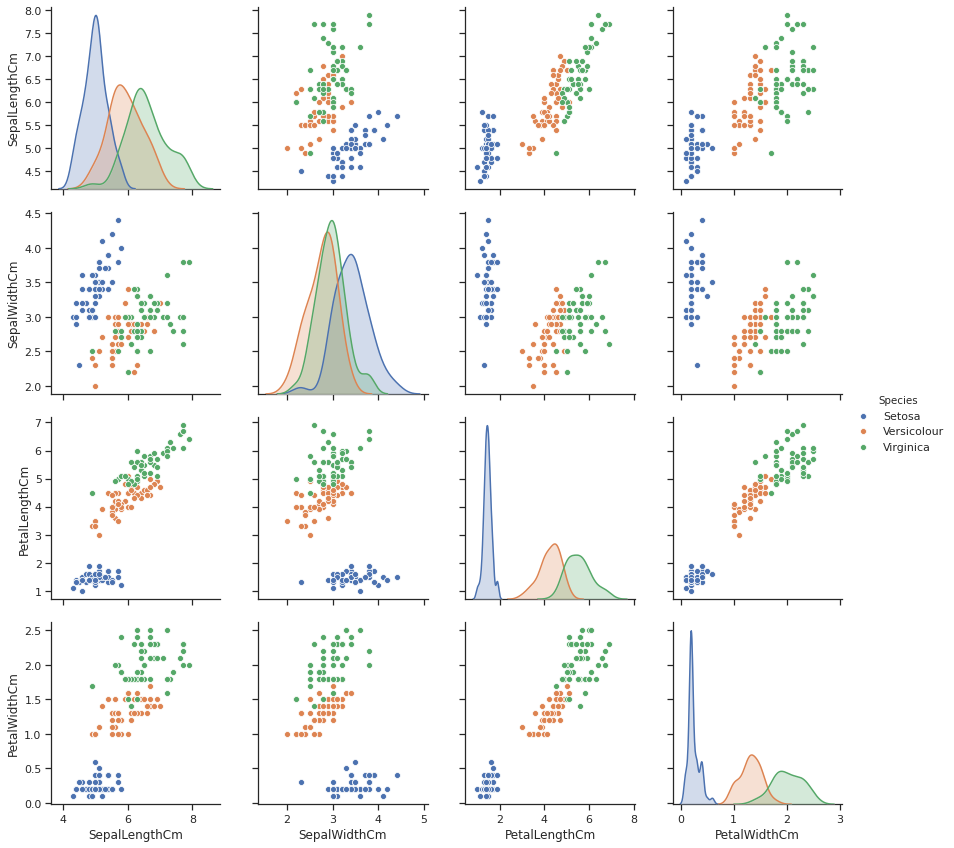

In [28]:
# Data visualization
sns.pairplot(df.drop("target", axis=1), hue="Species", height=3)
plt.show()

<h2> Decision Tree Classifier </h2>

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [29]:
# Decision Tree Classifier
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
y_pred = clf.predict(X_test)

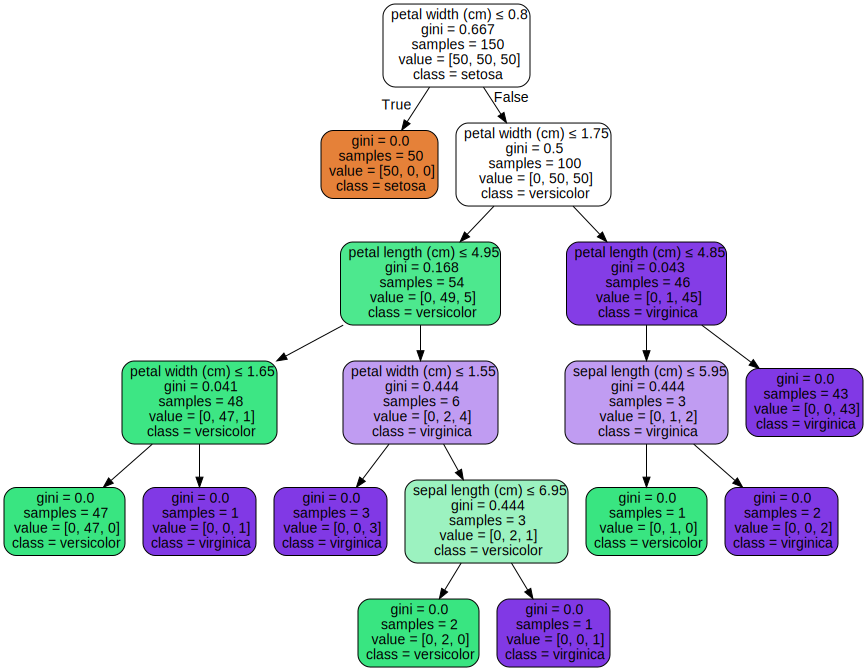

In [30]:
# Plotting the Decision tree 
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)  
graph

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



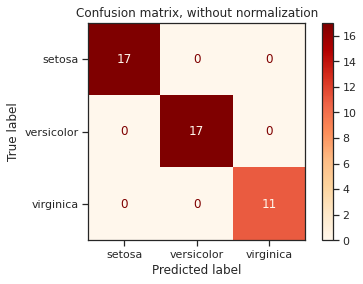

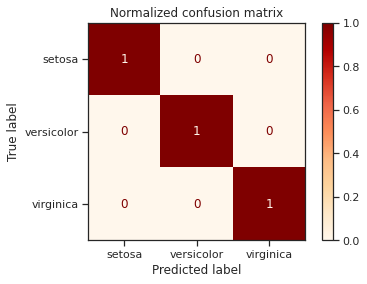

In [31]:
class_names = iris.target_names
# Accuracy and other metrics
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion matrix for the Decision tree classifier
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.OrRd,
                                 normalize=normalize)
    disp.ax_.set_title(title)


plt.show()

<h2> Gaussian Naive Bayes Classifier</h2>

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. For Gaussian Naive bayes classifier, the likelihood of the features is assumed to be Gaussian. 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.94      0.97        17
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



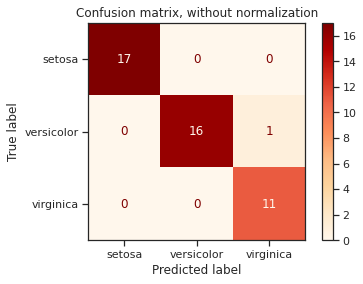

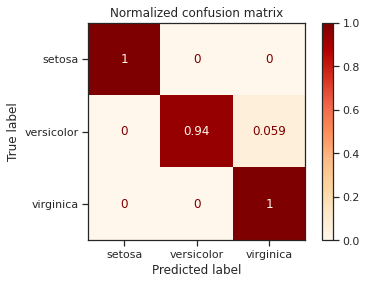

In [32]:
from sklearn.naive_bayes import GaussianNB

# Fit a Gaussian Naive Bayes on Iris dataset
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Accuracy and other metrics
print(classification_report(y_test, y_pred, target_names=class_names))



# plot confusion matrix for Naive Bayes
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gnb, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.OrRd,
                                 normalize=normalize)
    disp.ax_.set_title(title)


plt.show()

<h4> Comparing the accuracies of both the methods, we can see that decision tree performs better than naive bayes classifier </h4>